Monte Carlo Localization

In this assignment you need to implement a particle filter algorithm for localizing a robot in a given map. 
The data for this exercise is recorded on a differential drive robot equipped with a 2D laser scanner that moves in the following environment:

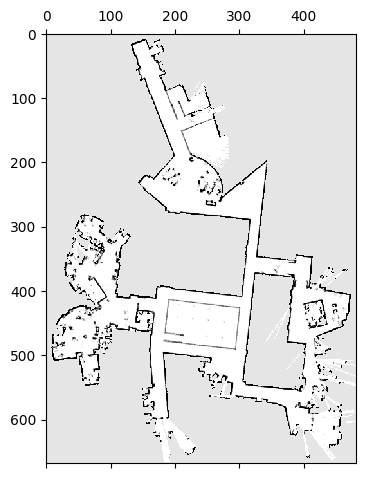

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import M as ex

%matplotlib inline

data = pickle.load(open("dataset_mit_csail.p", "rb"))

plt.matshow(data['img_map'], cmap="gray")
plt.show()

The following data is provided in `data`:

- *img_map* is the image of the environment where the robot must localize
- *likelihood_map* is the likelihood map defined over the environment and used for computing the weights of the particles
- *odom* is the noisy odometry readings observed by the robot during navigation in the form: $\delta_{rot1}, \delta_{trans}, \delta_{rot2}$
- *gt_odom* is the ground truth odometry, you may want to use it for checking your results
- *z* are the laser range measurements (37 beams $\rho_i, \phi_i$) obtained by the robot during navigation, where $\rho_i$ is the range and $\theta_i$ the corresponding firing angle defined wrt the robot orientation

You can access the `data` as follows:

In [2]:
# get odometry reading at timestep 25
odom_25 = data['odom'][25]
print("Odom at step 25 is: ", odom_25)

# get ground truth odometry reading at timestep 25
odom_gt_25 = data['gt_odom'][25]
print("True odom at step 25 is: ", odom_25)

# get observed scan at timestep 10
z_10 = data['z'][10]
print("Angles at step 10 is: ", z_10[0,:])
print("Ranges at step 10 is: ", z_10[1,:])

Odom at step 25 is:  [ 0.11378333  0.50803543 -0.18586595]
True odom at step 25 is:  [ 0.11378333  0.50803543 -0.18586595]
Angles at step 10 is:  [-1.570796e+00 -1.483526e+00 -1.396256e+00 -1.308986e+00 -1.221716e+00
 -1.134446e+00 -1.047176e+00 -9.599060e-01 -8.726360e-01 -7.853660e-01
 -6.980960e-01 -6.108260e-01 -5.235560e-01 -4.362860e-01 -3.490160e-01
 -2.617460e-01 -1.744760e-01 -8.720600e-02  6.400000e-05  8.733400e-02
  1.746040e-01  2.618740e-01  3.491440e-01  4.364140e-01  5.236840e-01
  6.109540e-01  6.982240e-01  7.854940e-01  8.727640e-01  9.600340e-01
  1.047304e+00  1.134574e+00  1.221844e+00  1.309114e+00  1.396384e+00
  1.483654e+00  1.570924e+00]
Ranges at step 10 is:  [ 3.    2.99  1.33  1.23  1.16  1.14  1.34  1.43  1.4   2.94  3.    3.07
  3.2   3.22  3.59  3.7   3.86  2.75 81.91  1.65  1.68  1.81 81.91 81.91
  4.73  4.76  3.76  4.18  2.3   2.31  5.7   2.33  2.41  4.23  4.09  4.02
 81.91]


# Before starting the implementation, first see what data we have and how it looks

Keys in data: dict_keys(['odom', 'gt_odom', 'z', 'likelihood_map', 'img_map'])
Map resolution (meters/pixel): 1.6597510373443984
Map shape (pixels): (668, 482)


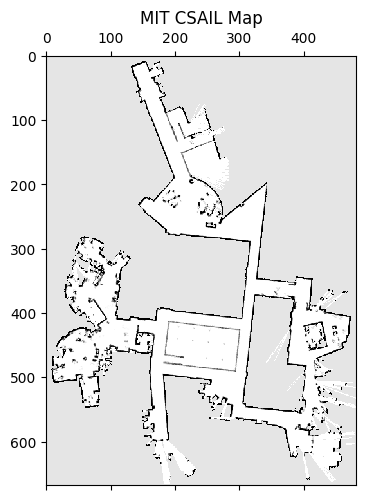

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pickle.load(open("dataset_mit_csail.p", "rb"))

# Extract map resolution (manual calculation)
map_width_pixels = data['img_map'].shape[1]
real_world_width = 800  # CSAIL map is 40 meters wide
map_res = real_world_width / map_width_pixels

# Print dataset keys and map info
print("Keys in data:", data.keys())
print("Map resolution (meters/pixel):", map_res)
print("Map shape (pixels):", data['img_map'].shape)

# Plot the map
plt.matshow(data['img_map'], cmap="gray")
plt.title("MIT CSAIL Map")
plt.show()



## 7.1 Motion update [1.0]

The `sample_motion_model_odometry` function defines the sampling-based odometry motion model. 

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$
- the odometry readings $u_t = [\delta_{rot1}, \delta_{trans}, \delta_{rot2}]$ 
- the noise parameters $\mathbf{\alpha} = [0.1, 0.1, 0.1, 0.1]$

The output is a new (sampled) pose predicted by the motion model.

Implement the `sample_motion_model_odometry` function and verify that it is correct for some test input. 





# Reasoning & Comparison with the Real Equation:

# 1. Noise Modeling (Equation 5.7):

. The function correctly models the noise in motion using four parameters (alpha values), which influence variance in rotation and translation.
. Variances for rot1, trans, and rot2 are computed as quadratic functions of thec orresponding motion components.

# 2. Gaussian Sampling for Motion Noise:

The function correctly applies Gaussian noise to delta_rot1, delta_trans, and delta_rot2, simulating uncertainty in movement.
# 3. Motion Update (Equation 5.9):

The function correctly updates x, y, and theta using the noisy values

# 4. Angle Normalization:

The function modifies theta_new using modulo 2π, ensuring angles remain within the valid range [0,2π], which is a necessary step in robotics applications.

# STEP 1:

This code is testing a function `sample_motion_model_odometry()` that likely simulates the change in robot pose based on odometry data with added noise. The function is probably used in the context of robotics to model motion with uncertainty. Here's a breakdown of what each part does:

1. **Imports**:
   - `import numpy as np`: This imports the NumPy library for numerical operations, such as handling arrays and performing math.
   - `from ex7 import *`: This imports functions and classes from a module named `ex7`, which is expected to contain the `sample_motion_model_odometry()` function.

2. **Variables Initialization**:
   - `x_prev`: The initial pose of the robot (x=0.0, y=0.0, θ=0.0).
   - `u`: The odometry reading, which consists of three parts: 
     - `rot1` (first rotation angle),
     - `trans` (translation distance),
     - `rot2` (second rotation angle).
   - `alpha`: A tuple of noise parameters for the motion model, representing noise in the robot's motion.

3. **Test Case 1 (Noise)**:
   - The code first runs a test case where the motion model is sampled with some default noise values (`alpha`). It prints the result, showing how the robot's new pose is influenced by the noise.

4. **Test the Function**:
   - The second part tests the motion model with a specific odometry input: 
     - A rotation of `30°` (`π/6` radians), followed by a translation of `1 meter`, and then another `30°` rotation.
   - The code prints the previous pose, the odometry input, and the new pose after applying the motion model.

This process simulates the motion of a robot with odometry data, considering noise in the motion model that can cause deviations in the final position.

In [ ]:
import numpy as np
from M import *
x_prev = np.array([0.0, 0.0, 0.0])
u = np.array([0.0, 1.0, 0.0])
alpha = (0.1, 0.1, 0.1, 0.1)  # Default noise 

x_new = sample_motion_model_odometry(x_prev, u, alpha)
print("Test Case 1 (Noise):", x_new)  

# Test the function
x_prev = np.array([0.0, 0.0, 0.0])  # Initial pose (x=0, y=0, theta=0)
u = np.array([np.pi/6, 1.0, np.pi/6])  # Example odometry (rot1=30°, trans=1m, rot2=30°)

x_new = sample_motion_model_odometry(x_prev, u)
print("Previous Pose:", x_prev)
print("Odometry:", u)
print("New Pose:", x_new)

Test Case 1 (Noise): [ 1.27234812 -0.1137259   6.07484295]
Previous Pose: [0. 0. 0.]
Odometry: [0.52359878 1.         0.52359878]
New Pose: [1.19076954 0.9707954  0.99698987]


## 7.2 Compute weights [3.0]

The `compute_weights` function is responsible for computing the importance weight for each particle according to the observation model, i.e.,

$$w_{i,t} = \eta\,p(z_{t}|x_{i,t}).$$

The motion model is obtained by querying the likelihood map defined over the environment in the endpoints of the laser scan ranges.

The available `ranges2cells` function computes the endpoints of raw scans $(\rho, \phi)$ into map coordinates.

Implement the `compute_weights` function and verify that it is correct for some test input. 

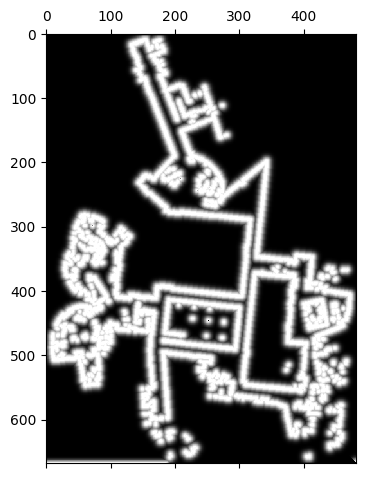

In [4]:
plt.matshow(data['likelihood_map'], cmap="gray")
plt.show()



# STEP 2:

This code demonstrates a particle filter for robot localization:

1. **Loading Data**: It loads a dataset (`dataset_mit_csail.p`), but it's not used here.
2. **Generating Particles**: It creates random particles with positions (`x`, `y`, `theta`) and weights.
3. **Lidar Measurements**: It generates dummy lidar data with angles and ranges.
4. **Likelihood Map**: A random grid is used as a placeholder for the environment's likelihood map.
5. **Computing Weights**: It computes the weight of each particle based on how well its predicted lidar readings match the actual measurements.

The purpose is to simulate updating particle weights using sensor data for robot localization.

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pickle.load(open("dataset_mit_csail.p", "rb"))
np.random.seed(42)  # For reproducibility
    
# Generate dummy particles (N = 5)
num_particles = 5
particles = np.random.rand(num_particles, 4)  # Random x, y, theta, weight

# Generate dummy lidar measurements
angles = np.linspace(-np.pi / 4, np.pi / 4, 37)  # 37 beams covering 90 degrees
ranges = np.abs(np.random.randn(37)) + 1  # Random distances (ensure > 0)
z = np.vstack((angles, ranges))

# Create a dummy likelihood map
likelihood_map = np.random.rand(100, 100)  # 100x100 grid with random values

# Compute weights
weights = compute_weights(particles, z, likelihood_map)

# Print results
print("Particles:\n", particles)
print("\nLidar Measurements:\n", z)
print("\nComputed Weights:\n", weights)


Particles:
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]]

Lidar Measurements:
 [[-0.78539816 -0.74176493 -0.6981317  -0.65449847 -0.61086524 -0.56723201
  -0.52359878 -0.47996554 -0.43633231 -0.39269908 -0.34906585 -0.30543262
  -0.26179939 -0.21816616 -0.17453293 -0.13089969 -0.08726646 -0.04363323
   0.          0.04363323  0.08726646  0.13089969  0.17453293  0.21816616
   0.26179939  0.30543262  0.34906585  0.39269908  0.43633231  0.47996554
   0.52359878  0.56723201  0.61086524  0.65449847  0.6981317   0.74176493
   0.78539816]
 [ 2.01283112  1.31424733  1.90802408  2.4123037   2.46564877  1.2257763
   1.0675282   2.42474819  1.54438272  1.11092259  2.15099358  1.37569802
   1.60063869  1.29169375  1.60170661  2.85227818  1.01349722  2.05771093
   1.82254491  2.22084365  1.2088636   2.95967012 

## 7.3 Resampling [3.0]

The `resample` function is responsible for re-sampling particles according to their weight (the higher the more likely to be samples) and, thus, “kills” the particles with low weight.

Implement the `resample` function and verify that it is correct for some test input. 

# STEP 3:

This code demonstrates the resampling of particles in a particle filter:

1. **Particle Initialization**: It generates 1000 random particles with `x`, `y` positions, orientations (`theta`), and random weights.

2. **Normalization**: The weights are normalized so that they sum up to 1.

3. **Resampling Function**: It uses the `resample` function (not defined in this snippet) to resample particles based on their weights. The resampling helps to focus more on particles with higher weights, simulating a better estimate of the robot's position.

4. **Visualization**: 
   - The first plot shows the original particles with their weights represented by color.
   - The second plot shows the resampled particles, which are likely to be concentrated in areas with higher weights.

The resampling is critical in particle filters to correct for the degeneration of particle weights over time.

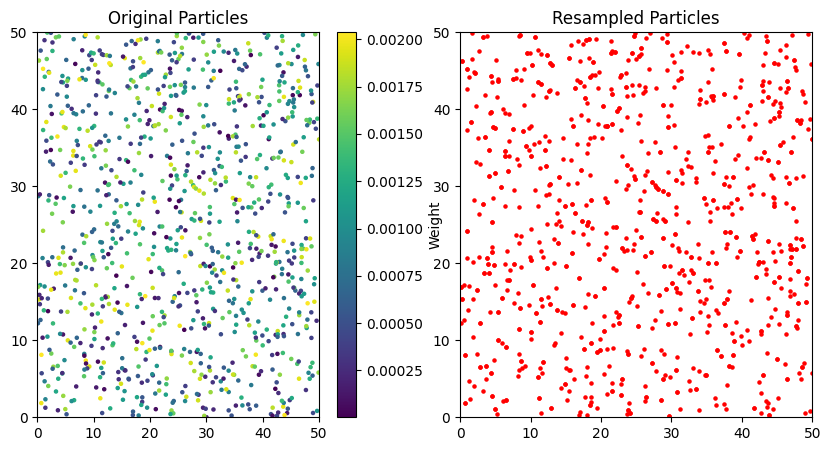

In [6]:
#********* its just to check my resample function************
import numpy as np
import matplotlib.pyplot as plt

# Create sample particles (N, 4) with random positions and orientations
num_particles = 1000
img_map = np.zeros((500, 500))  # Example 500x500 map
map_res = 0.1  # Map resolution (10 cm per pixel)

# Initialize random particles
particles = np.zeros((num_particles, 4))
particles[:, 0] = np.random.uniform(0, img_map.shape[1] * map_res, num_particles)  # X positions
particles[:, 1] = np.random.uniform(0, img_map.shape[0] * map_res, num_particles)  # Y positions
particles[:, 2] = np.random.uniform(-np.pi, np.pi, num_particles)  # Theta
particles[:, 3] = np.random.rand(num_particles)  # Random weights

# Normalize weights
weights = particles[:, 3] / np.sum(particles[:, 3])

# Call resampling function
resampled_particles = resample(particles, weights, img_map, map_res)

# Plot before and after resampling
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Particles")
plt.scatter(particles[:, 0], particles[:, 1], c=weights, cmap='viridis', s=5)
plt.colorbar(label="Weight")
plt.xlim(0, img_map.shape[1] * map_res)
plt.ylim(0, img_map.shape[0] * map_res)

plt.subplot(1, 2, 2)
plt.title("Resampled Particles")
plt.scatter(resampled_particles[:, 0], resampled_particles[:, 1], c='r', s=5)
plt.xlim(0, img_map.shape[1] * map_res)
plt.ylim(0, img_map.shape[0] * map_res)

plt.show()


## 7.4 Localization [3.0]

Once you complete all the above functions, implement the main procedure of Monte Carlo localization `mc_localization` which recursively estimate the position of the robot using the odometry data and the laser scans.

Consider 5000 particles that are intialized uniformly over the environment. 

The map resolution is 0.1 and each particle is a $(x,y,\theta)$ pose.

Plot the belief about the position of the robot after the sequence of odometry readings and laser scans provided in `data` by using the `plot_particles` function.

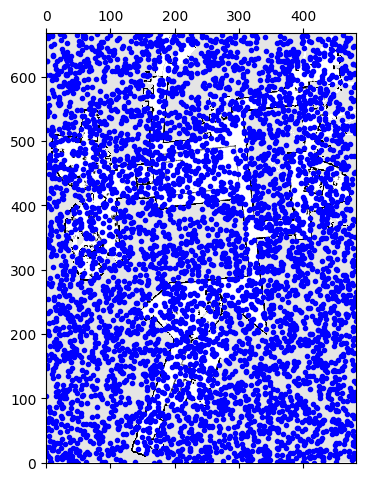

In [7]:
num_particles = 5000
map_res = 0.1

particles = ex.init_uniform(num_particles, data['img_map'], map_res)
ex.plot_particles(particles, data['img_map'], map_res)

# STEP 4:

This code is designed to perform **Monte Carlo Localization (MCL)** using a dataset (`dataset_mit_csail.p`) and visualizes the particles in the final localization state. Here's a breakdown:

1. **Imports**:
   - `ex7`: This module likely contains the implementation of the `mc_localization` function.
   - `pickle` and `matplotlib`: Used for loading the dataset and visualizing the results.

2. **Map Resolution**: The resolution of the map is set to `0.1`, meaning each pixel corresponds to 10 cm in the real world.

3. **Loading Data**: The dataset `dataset_mit_csail.p` is loaded, containing information like lidar measurements and landmarks.

4. **Running MCL**: The `mc_localization` function is invoked with:
   - `data`: The loaded dataset.
   - `num_particles=5000`: The number of particles to be used in localization.
   - `map_res=0.1`: The map resolution.

   This function likely performs localization using particles, updating their weights and positions based on sensor measurements.

5. **Visualization**: After running MCL, the `final_particles` (likely representing the estimated robot locations) are stored and ready for visualization (though this part isn't shown explicitly). 



# SCROLL DOWN AND SEE GIFF FILE

In [ ]:
from ex7 import *
# Load data
import pickle
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

map_res = 0.1  # From your earlier calculation
data = pickle.load(open("dataset_mit_csail.p", "rb"))


# Run MCL
final_particles = mc_localization(data, num_particles=5000, map_res=map_res)

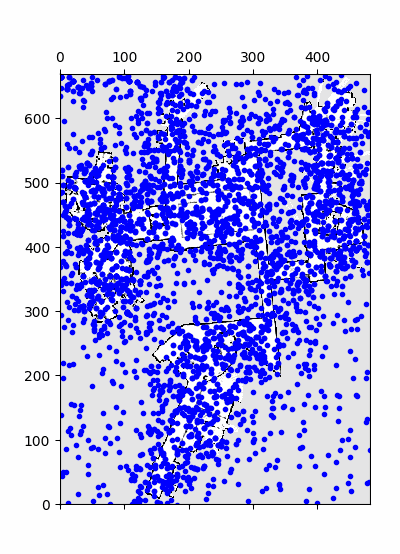

In [9]:
from IPython.display import Image

# Display the GIF in the notebook
Image(filename='mygif.gif')